<a href="https://colab.research.google.com/github/gdemarchis/APCSP/blob/main/Car_Crash_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Gabe DeMarchis, Car Crashes in NYC, 3/5/24, This data set explains the location and in depth information about each car crash.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

In [4]:
data = pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv')
data.describe(include='all')

<ipython-input-4-f622fd965e2b>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,2070322,2070322,1426180,1425930.0,1.836987e+06,1.836987e+06,1836987,1631193,1288511,346756,...,1749821,147828,33355,9026,2.070322e+06,2056717,1675377,142496,32203,8752
unique,4263,1440,5,426.0,NaN,NaN,282227,18394,20225,224929,...,61,51,41,30,NaN,1618,1812,260,100,70
top,01/21/2014,16:00,BROOKLYN,11207.0,NaN,NaN,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,28346,453468,20640.0,NaN,NaN,4350,17277,9843,402,...,1473203,137813,31465,8508,NaN,574309,402217,44210,10733,3024
mean,NaN,NaN,NaN,NaN,4.062767e+01,-7.375209e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.155805e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.980974e+00,3.724235e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.505033e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,-2.013600e+02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.066782e+01,-7.397485e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.153700e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.072084e+01,-7.392727e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.671400e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.076961e+01,-7.386673e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.189224e+06,NaN,NaN,NaN,NaN,NaN


In [5]:
data.BOROUGH.mean
#mean value of the Boroughs

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0                NaN
1                NaN
2                NaN
3           BROOKLYN
4           BROOKLYN
             ...    
2070317     BROOKLYN
2070318     BROOKLYN
2070319          NaN
2070320          NaN
2070321    MANHATTAN
Name: BOROUGH, Length: 2070322, dtype: object>

In [56]:
data.shape
#2million rows of data, 29 columns. (TAKES FOREVER TO LOAD)

(2070069, 29)

In [ ]:
data.head(5)
#first five columns (random order)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe(include="all")
#all data averages, counts, and percentages (summary)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,2070069,2070069,1426009,1425759.0,1.836747e+06,1.836747e+06,1836747,1631008,1288388,346688,...,1749628,147794,33347,9024,2.070069e+06,2056468,1675211,142465,32194,8750
unique,4262,1440,5,426.0,NaN,NaN,282192,18392,20225,224891,...,61,51,41,30,NaN,1618,1811,260,100,70
top,01/21/2014,16:00,BROOKLYN,11207.0,NaN,NaN,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,28345,453423,20635.0,NaN,NaN,4350,17277,9843,402,...,1473041,137780,31458,8506,NaN,574194,402146,44197,10730,3023
mean,NaN,NaN,NaN,NaN,4.062766e+01,-7.375207e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.155616e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.981103e+00,3.724478e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.505028e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,-2.013600e+02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.066782e+01,-7.397485e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.153637e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.072084e+01,-7.392727e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.671273e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.076960e+01,-7.386673e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.189034e+06,NaN,NaN,NaN,NaN,NaN


In [6]:
data.sort_values('NUMBER OF PERSONS INJURED')
#data set determined by number of people injured, you cant see it on the screen at the moment, since theres 29 columns, but it is in order


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1035168,10/02/2016,16:15,QUEENS,11432.0,40.708050,-73.798920,"(40.70805, -73.79892)",NaN,NaN,88-38 163 STREET,...,Unspecified,NaN,NaN,NaN,3532263,Sedan,NaN,NaN,NaN,NaN
1284126,08/16/2015,1:00,BRONX,10462.0,40.846426,-73.860329,"(40.8464259, -73.860329)",MORRIS PARK AVENUE,DELANCEY PLACE,NaN,...,Unspecified,NaN,NaN,NaN,3278488,SPORT UTILITY / STATION WAGON,VAN,NaN,NaN,NaN
1284125,09/01/2015,20:30,QUEENS,11420.0,40.666857,-73.804245,"(40.6668568, -73.8042452)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3289070,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1284124,08/25/2015,15:30,BROOKLYN,11207.0,40.655564,-73.879733,"(40.6555642, -73.8797328)",FLATLANDS AVENUE,SCHENCK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3284750,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1284123,08/27/2015,13:00,QUEENS,11385.0,40.712902,-73.906077,"(40.7129023, -73.906077)",FOREST AVENUE,METRO AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3285487,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895750,05/01/2017,19:45,MANHATTAN,10007.0,40.717186,-74.012900,"(40.717186, -74.0129)",WEST STREET,CHAMBERS STREET,NaN,...,NaN,NaN,NaN,NaN,4024290,Bike,NaN,NaN,NaN,NaN
900960,04/26/2017,9:50,NaN,NaN,40.848312,-73.897350,"(40.848312, -73.89735)",WASHINGTON AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4024254,Sedan,NaN,NaN,NaN,NaN
931363,02/26/2017,14:42,BROOKLYN,11226.0,40.651104,-73.955900,"(40.651104, -73.9559)",NaN,NaN,2170 BEDFORD AVENUE,...,NaN,NaN,NaN,NaN,4024040,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
957651,01/06/2017,6:20,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4023867,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
data[''] = data[''].astype(int)
#change a string into a int, incase I need to

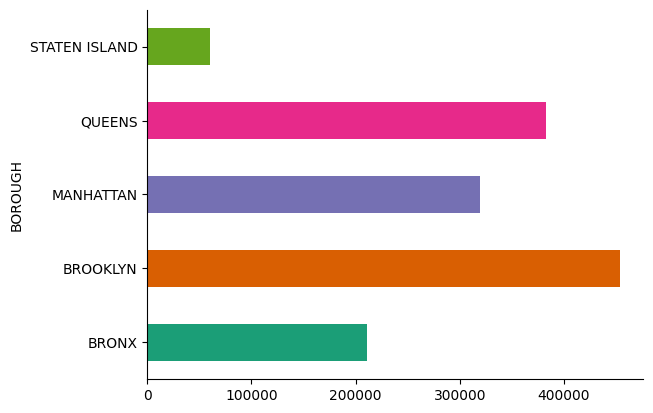

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('BOROUGH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
#graph showing number of crashes depending on what Borough
#Brooklyn has by far the most number of car crashes compared to all the other Boroughs, with an estimation of around 460,000 crashes.

array([[<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'NUMBER OF PERSONS KILLED'}>,
        <Axes: title={'center': 'NUMBER OF PEDESTRIANS INJURED'}>,
        <Axes: title={'center': 'NUMBER OF PEDESTRIANS KILLED'}>],
       [<Axes: title={'center': 'NUMBER OF CYCLIST INJURED'}>,
        <Axes: title={'center': 'NUMBER OF CYCLIST KILLED'}>,
        <Axes: title={'center': 'NUMBER OF MOTORIST INJURED'}>],
       [<Axes: title={'center': 'NUMBER OF MOTORIST KILLED'}>,
        <Axes: title={'center': 'COLLISION_ID'}>, <Axes: >]], dtype=object)

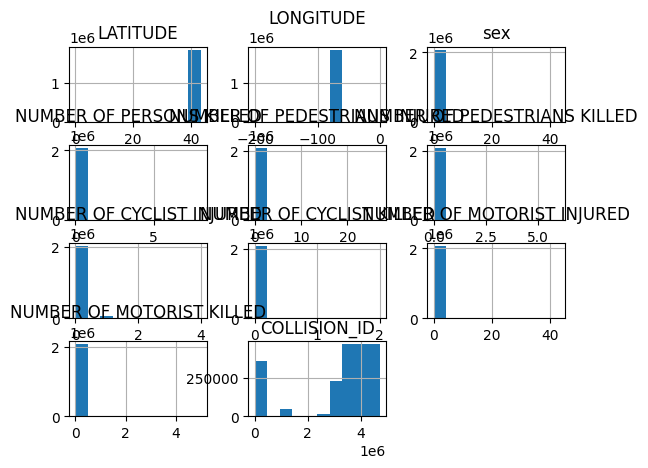

In [ ]:
data.hist()
#random histogram to determine what is easy to graph in future

In [ ]:
datafixed = data.fillna(0)
#turning all the NaN values to 0 in the dataset

In [ ]:
#data.rename(columns={"NPI": "NUMBER OF PERSONS INJURED"}, inplace=True)
#was going to rename column to not have any spaces, but it was necessary anymore (displayed below)

In [ ]:
Trimmed = data.query('NUMBER OF PERSONS INJURED > 1')
#attempting to trim the data for a graph, but the spaces in the column name mess the trimming up.

array([[<Axes: title={'center': 'BRONX'}>,
        <Axes: title={'center': 'BROOKLYN'}>],
       [<Axes: title={'center': 'MANHATTAN'}>,
        <Axes: title={'center': 'QUEENS'}>],
       [<Axes: title={'center': 'STATEN ISLAND'}>, <Axes: >]],
      dtype=object)

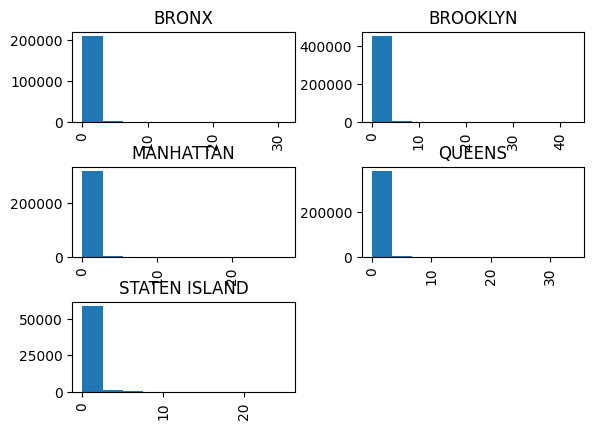

In [ ]:
data.hist(column='NUMBER OF PERSONS INJURED',by='BOROUGH')
#histogram of each Borough and the amount of times a certain number of indivuals were injured.

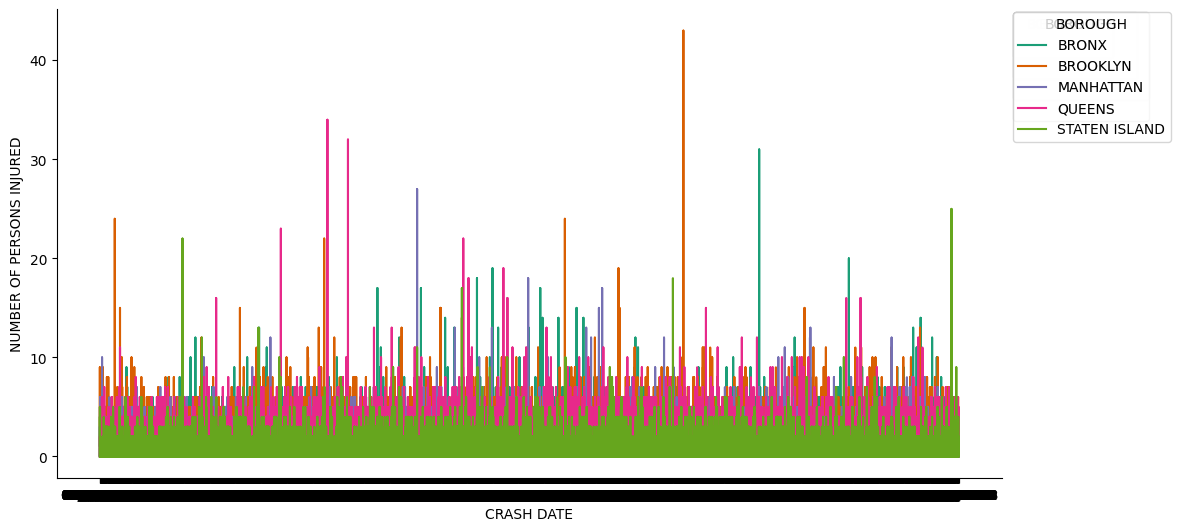

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CRASH DATE']
  ys = series['NUMBER OF PERSONS INJURED']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('CRASH DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BOROUGH')):
  _plot_series(series, series_name, i)
  fig.legend(title='BOROUGH', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CRASH DATE')
_ = plt.ylabel('NUMBER OF PERSONS INJURED')
#Graph displaying overtime how many people tend to be injured in accidents in each Borough,
#the only distinct claim you can make from this graph is Queens is almost always having a larger number of persons injured than Staten Island.
#also brooklyn has the most number of car crashes, as well as the largest car crash with the most individuals injured.

<ipython-input-32-3767a5b23c42>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


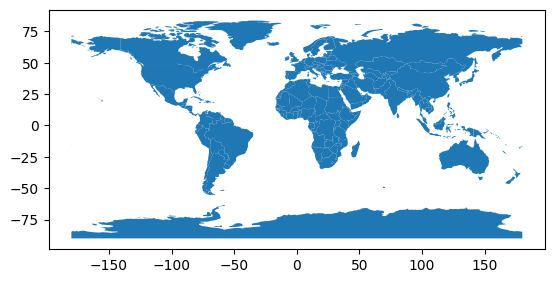

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot();
#importing world map


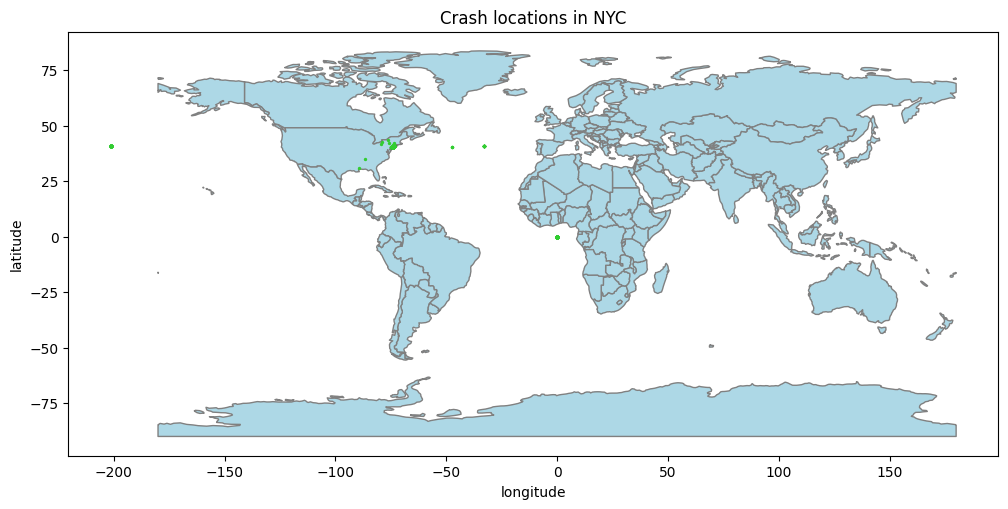

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))  #This is definings some nicknames for the figure we'll print. We'll use ax in later commands.
x = data['LONGITUDE']
y = data['LATITUDE']
world.plot(ax=ax, color='lightblue', edgecolor='grey')
ax.scatter(x,y, s=2, color='limegreen')
ax.set_title('Crash locations in NYC')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()
#plotting long, and lat of each dataset onto the map

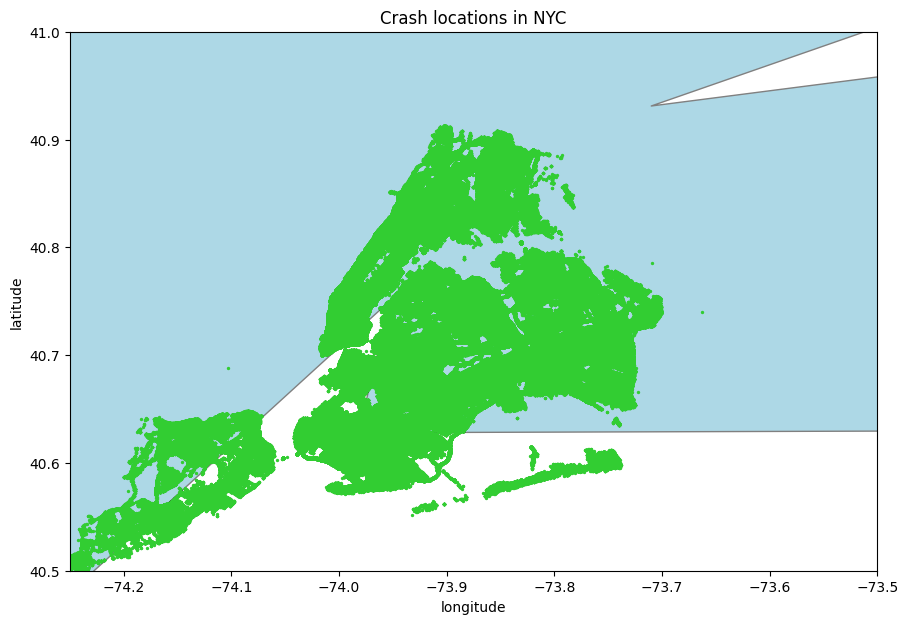

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))  #This is definings some nicknames for the figure we'll print. We'll use ax in later commands.
x = data['LONGITUDE']
y = data['LATITUDE']
world.plot(ax=ax, color='lightblue', edgecolor='grey')
ax.scatter(x,y, s=2, color='limegreen')
ax.set_title('Crash locations in NYC')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_xlim(-74.25, -73.50)    # This zooms into the long. coordinates for the continental US
ax.set_ylim(40.50, 41)        # This zooms into the lat. coordinates for the continental US
plt.show()
#since this dataset is crashing only taking place in NYC, this map is zoomed in on specific lats, and longs, to be easier to understand.

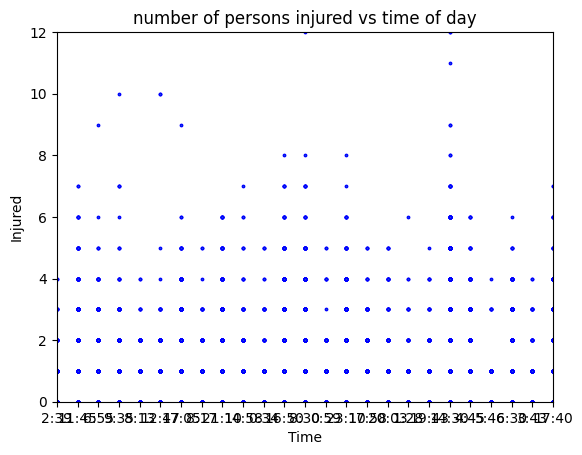

In [59]:
plotdata = data #.query('1900') # redefining the data to plot based on your query
x=plotdata['CRASH TIME']
y=plotdata['NUMBER OF PERSONS INJURED']
plt.scatter(x,y, s=3, alpha=1,edgecolors='blue')
plt.xlabel('Time')
plt.ylabel('Injured')
plt.title('number of persons injured vs time of day')
plt.axis([0, 24, 0, 12]) #choose the first two numbers based on what you chose above
plt.show()
#Graph showing number of people injured at specific times of the day, though time of day is not displayed at just one number, so the x axis is a bit mixed up.